# DAGRegressors 

Predict a set of house prices given a small set of features

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [5]:
print(load_boston(return_X_y=False)["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X, y = load_boston(return_X_y=True)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X) # z-score features
y = (y - y.mean()) / y.std() # z-score target

## Linear DAG regressor

In [11]:
from causalnex.structure import DAGRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [27]:
X, y = load_boston(return_X_y=True)

reg = DAGRegressor(
                alpha=0.1,  # L1 regularizer
                beta=0.9,  # L2 regularizer
                fit_intercept=True,  
                hidden_layer_units=None,  # linear model
                dependent_target=True,  # enforce y to be a child node
                enforce_dag=True,  # threshold the model structure to be a DAG (visualization only)
    standardize=True,
                 )

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.310325
AGE        0.000000
DIS       -0.225569
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT     -0.372147
dtype: float64


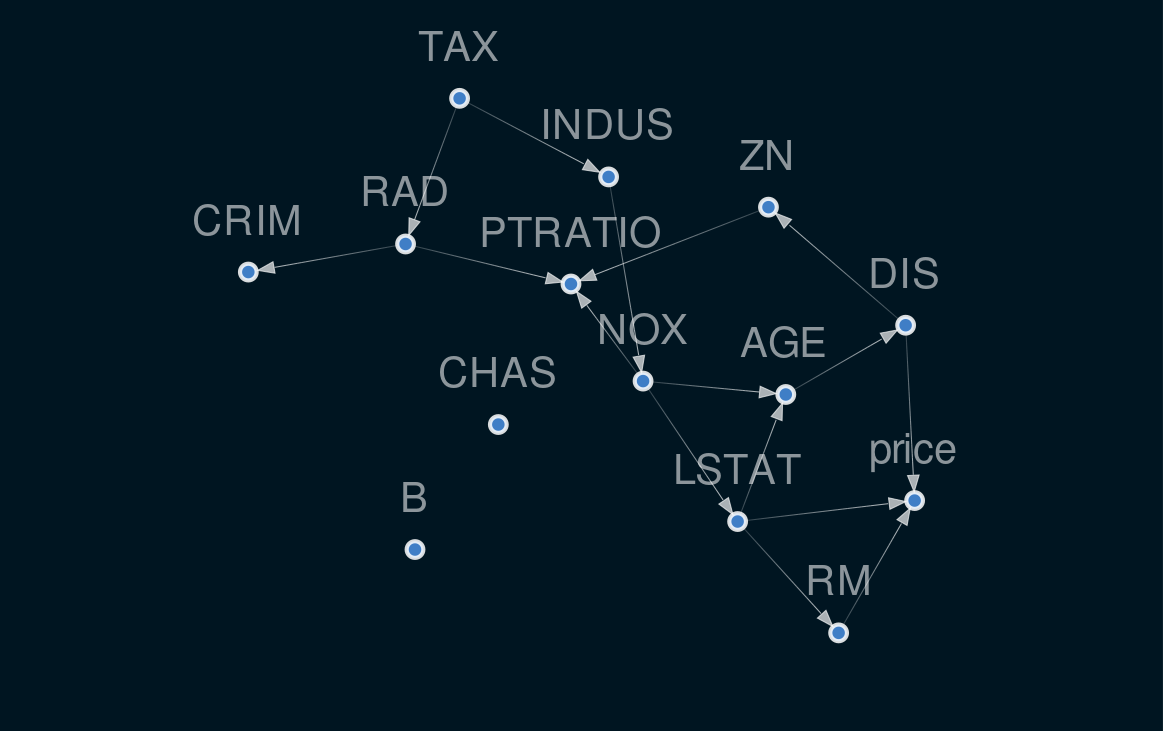

In [28]:
X_pd = pd.DataFrame(X, columns=load_boston(return_X_y=False)["feature_names"])
y_pd = pd.Series(y, name="price")
reg.fit(X_pd, y_pd)
print(pd.Series(reg.coef_, index=load_boston(return_X_y=False)["feature_names"]))
reg.plot_dag(True)

In [29]:
scores = cross_val_score(reg, X, y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN R2: {np.mean(scores).mean():.3f}')

MEAN R2: 0.706


## Nonlinear DAGRegressor

In [33]:
X, y = load_boston(return_X_y=True)

reg = DAGRegressor(threshold=0.0,
                    alpha=0.0,
                    beta=0.5,
                    fit_intercept=True,
                    hidden_layer_units=[5], # 1 hidden layer with 5 neurons
                    standardize=True,
                   dependent_target=True,
                 )

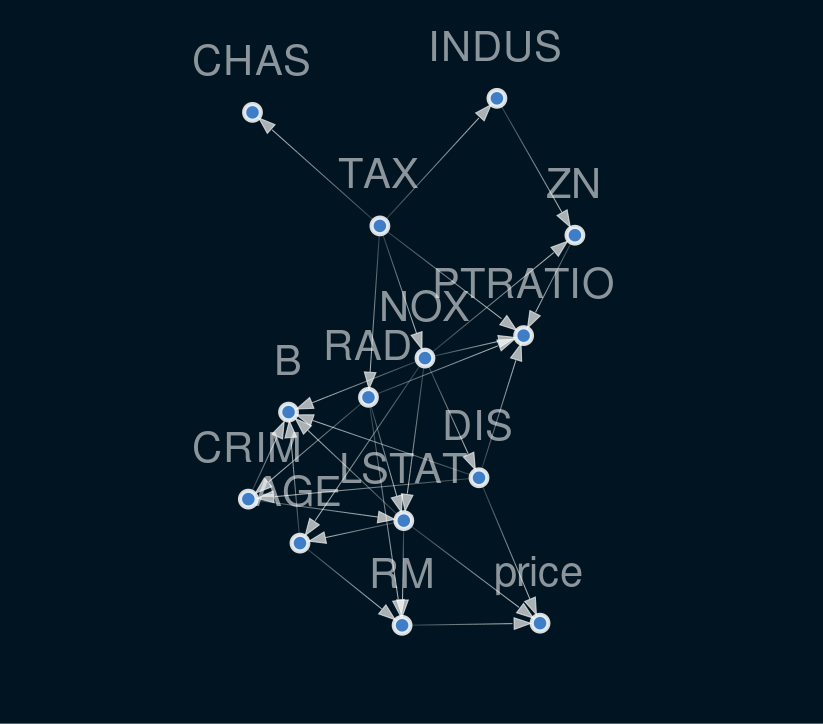

In [34]:
X_pd = pd.DataFrame(X, columns=load_boston(return_X_y=False)["feature_names"])
y_pd = pd.Series(y, name="price")
reg.fit(X_pd, y_pd)

reg.plot_dag(True)

In [35]:
scores = cross_val_score(reg, X, y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN R2: {np.mean(scores).mean():.3f}')

MEAN R2: 0.842


`causalnex` provides `.coef_` and `.feature_importances_`, but the documentation is unclear how these are defined

In [38]:
reg.coef_

array([-0.15822797, -0.00828086, -0.03713307,  0.04251341, -0.22974682,
        0.28493854, -0.08798948, -0.34308079,  0.19808994, -0.18288098,
       -0.08347472,  0.04419196, -0.42689598])

In [36]:
reg.feature_importances_

array([0.158228  , 0.05073082, 0.07416046, 0.06229977, 0.22974685,
       0.32956341, 0.10196706, 0.34331182, 0.20798028, 0.1942316 ,
       0.1229571 , 0.0483392 , 0.42801818])